In [ ]:
# Motivation

# Shogun is a free, open source toolbox written in C++. It offers numerous algorithms and data structures for 
# machine learning problems. The toolbox seamlessly allows to easily combine multiple data representations, 
# algorithm classes, and general purpose tools. 
# The focus of Shogun is on kernel machines such as support vector machines for regression and classification problems. 

In [ ]:
# Motivation

# PyMC is a python module that implements Bayesian statistical models and fitting algorithms, including Markov 
# chain Monte Carlo. Its flexibility and extensibility make it applicable to a large suite of problems. 
# Along with core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit 
# and convergence diagnostics

In [ ]:
# Context

# There are multiple libraries for Machine Learning in Python. Most common ones are: scikit-learn, Theano, Pylearn2, 
# PyMC, and Caffe among others.

# Scikit-learn is developed on top of NumPy, SciPy, and matplotlib libraries, so it'll have a familiar feel to it 
# for the many people that already use these libraries

# Theano allows the users to define, optimize, and evaluate mathematical expressions and use multidimensional arrays to solve.
# Theano (like scikit-learn) also integrates with NumPy and it's used more commonly for research purposes rather than 
# development purpose. 

# PyLearn2 is built on top of Theano. It also wraps libraries like scikit-learn and this limits the usability of completely 
# custom-written code. Though with the wrapping of other libraries, PyLearn2 gets more and more flexible, but at the same time
# it gets dependent too.

# PyMC's number-crunching is done using a combination of NumPy (and the linear algebra libraries on which it depends) and 
# hand-optimized Fortran routine. For models with mostly scalar variables, PyMC takes a lot of time in coordinating 
# Python code. And so, it will be significantly slower than packages written in C. 

# Caffe is a library specific to the machine learning in vision applications. It could be used to create deep neural 
# networks that recognize the objects visually. Again, this makes the library more usable for academics and research purpose 
# and less for production. 

# Shogun, on the other hand, is developed in C++. This makes it a lot flexible, faster, and easy to be integrated with
# multiple data representations and algorithm classes. Very large datasets can be handled very efficiently with Shogun


# Below are the PyMC features:
# Includes a large suite of well-documented statistical distributions.
# Includes a module for modeling Gaussian processes.
# Sampling loops can be paused and tuned manually, or saved and restarted later.
# Creates summaries including tables and plots.

In [ ]:
# Installation instructions, platform restriction and dependent libraries

# Ready to install packages are available to install Shogun for Ubuntu, Mac, Windows (using MSVC), or Python Pypi

# Ubuntu
$ sudo add-apt-repository ppa:shogun-toolbox/stable
$ sudo apt-get update
$ sudo apt-get install libshogun17

# Fedora
$ sudo dnf install shogun

# Mac
$ sudo brew install shogun

# Python Pypi
$ pip install shogun-ml

# Windows
# Binary installer is currently not supported. It is compiled under Windows using MSVC 

# Requirements
# The standard GNU/Linux tools and Python are minimal requirements to compile Shogun. 
# At least 1GB free disk space is required. If any interface is compiled, ~4 GB of RAM is usually required.

# Dependencies
# Shogun uses CMake for its build. 
$ cd build
$ cmake [options] ..
$ make
$ make install 
$ make clean
# For Python, -DPythonModular is the cmake option for building interfaces. And the required package for this interface is
# python-dev python-numpy


In [ ]:
# Installation instructions, platform restriction and dependent libraries

# Ready to install packages are available to install PyMC for Linux, Mac, Windows, or Python Pypi

# Anaconda
conda install -c https://conda.binstar.org/pymc pymc
    
# Windows
# Download the Automated MinGW Installer. Install MSYS-1.0.exe. Type:
python setup.py install

# Mac/ Linux
python setup.py config_fc --fcompiler gfortran build
python setup.py install

# Github
git clone git://github.com/pymc-devs/pymc.git
    

# Requirements and dependent libraries
# There are some prerequisite packages for PyMC:
# 1. Python version 2.6 or later
# 2. NumPy (1.6 or newer)
# 3. Matplotlib
# Rest of the packages are optional and are usually called when needed


In [35]:
# Import relevant modules
import pymc
import numpy as np

# Some data
n = 5*np.ones(4,dtype=int)
x = np.array([-.86,-.3,-.05,.73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha',mu=0,tau=.01)
beta = pymc.Normal('beta',mu=0,tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a+b*x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0.,1.,3.,5.]),\
                  observed=True)



 [-----------------100%-----------------] 10000 of 10000 complete in 4.7 secPlotting alpha
Plotting beta
Plotting theta_0
Plotting theta_1
Plotting theta_2
Plotting theta_3


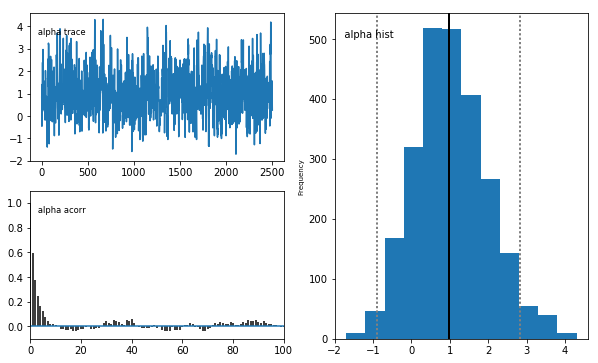

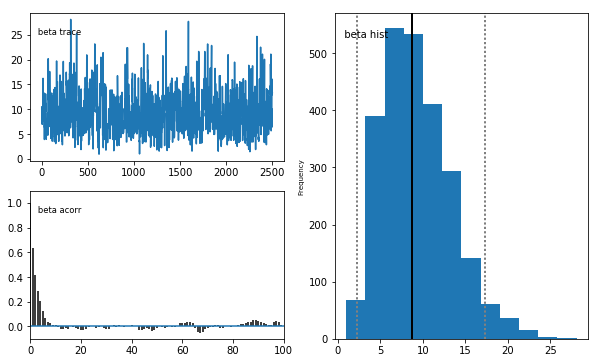

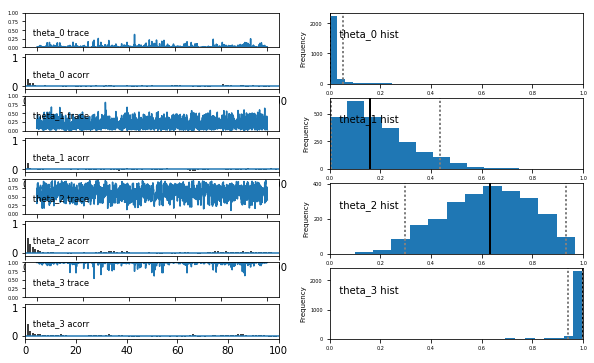

In [36]:
#import pymc
#import mymodel

S = pymc.MCMC([n,x,alpha,beta,theta], db='pickle')
S.sample(iter=10000, burn=5000, thin=2)
pymc.Matplot.plot(S)

In [18]:
# Working example

from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

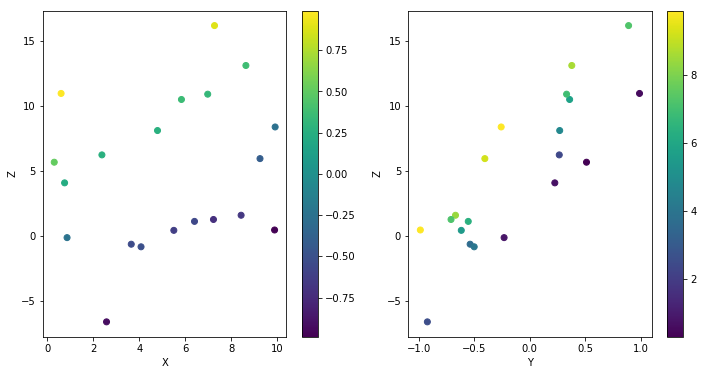

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')

In [20]:
import pymc
# define the parameters with their associated priors
alpha = pymc.Uniform('alpha', -100,100, value=median(z_obs))
betax = pymc.Uniform('betax', -100,100, value=std(z_obs)/std(x_true))
betay = pymc.Uniform('betay', -100,100, value=std(z_obs)/std(y_true))
eps = pymc.Uniform('eps', 0, 100, value=0.01)

# Now define the model
@pymc.deterministic
def model(alpha=alpha, betax=betax, betay=betay, x=x_true, y=y_true):
    return alpha + betax*x + betay*y

# pymc parametrizes the width of the normal distribution by tau=1/sigma**2
@pymc.deterministic
def tau(eps=eps):
    return power(eps, -2)

# Lastly relate the model/parameters to the data
data = pymc.Normal('data', mu=model, tau=tau, value=z_obs, observed=True)

In [21]:
sampler = pymc.MCMC([alpha,betax,betay,eps,model,tau,z_obs,x_true,y_true])
sampler.use_step_method(pymc.AdaptiveMetropolis, [alpha,betax,betay,eps],
                        scales={alpha:0.1, betax:0.1, betay:1.0, eps:0.1})
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 9.9 sec

Plotting tau
Plotting betay
Plotting alpha
Plotting betax
Plotting eps


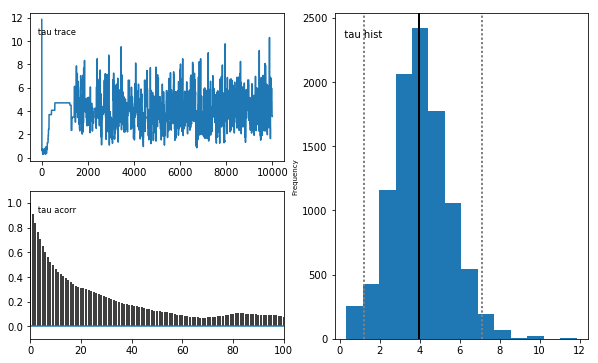

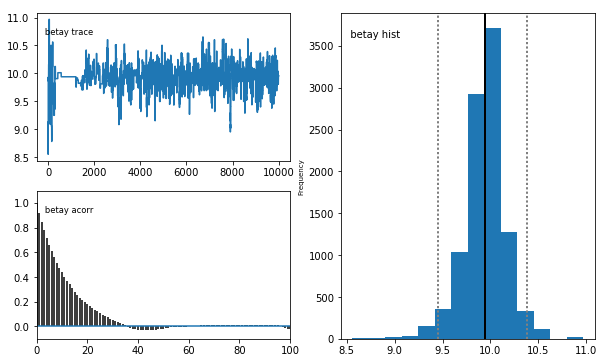

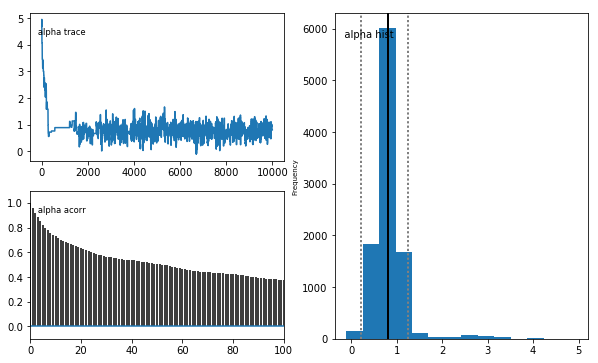

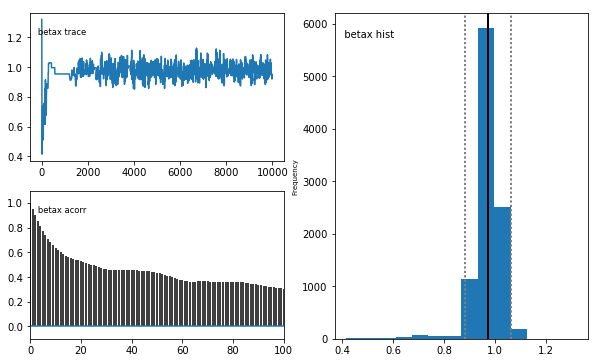

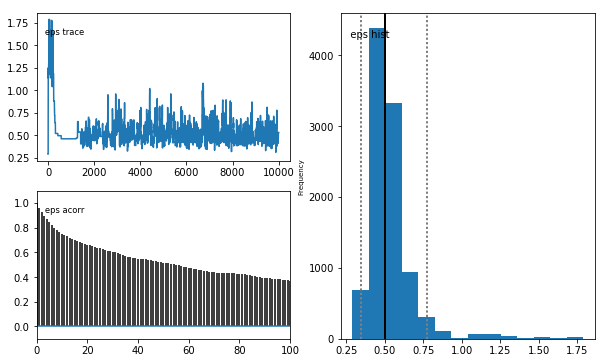

In [22]:
pymc.Matplot.plot(sampler)

In [ ]:
# Additional Features

# With PyMC, we are able to break the models into components and reuse those components. 
# Also, PyMC is not an entire package. Instead, it's a library. Thus, it gets easier for a user to use it in 
# conjugation with other systems (file-reading, graphing, output, further data-analysis, etc). This makes PyMC a lot more
# flexible as compared to other machine learning libraries.

# The developers have released PyMC 3 that features an expanded set of MCMC samplers, including Hamiltonian Monte Carlo. 
# They have integrated PyMC with Theano to provide automatic evaluation of mathematical expressions, including gradients 
# used by modern MCMC samplers. It also features benefits like intuitive model specification syntax and 
# transparent support for missing value imputation. All these enhancements make the library more flexible and extensible.


In [ ]:
# Summary
# MCMC is a surprisingly difficult and bug-prone algorithm to implement by hand. 
# We were able to implement it using PyMC makes very easily. Without PyMC, it was very 
# difficult to change the hand-coded working of MCMC but with PyMC, it is much easier.
# PyMC allows users to efficiently code a probabilistic model and draw samples from its posterior distribution 
# using Markov chain Monte Carlo techniques. 



In [ ]:
# References

# 1) http://pymc-devs.github.io/pymc
# 2) https://users.obs.carnegiescience.edu/cburns/ipynbs/PyMC.html
# 3) http://stackabuse.com/the-best-machine-learning-libraries-in-python
# 4) https://github.com/pymc-devs/pymc3